In [1]:
import pandas as pd
import numpy as np

In [2]:
players = pd.read_csv("players_21.csv")

In [3]:
players.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [4]:
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
players = players.dropna(subset=features)

In [6]:
data = players[features].copy()

In [7]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,560000.0,103500000.0,33
1,92,92,220000.0,63000000.0,35
2,91,91,240000.0,111000000.0,31
3,91,91,270000.0,132000000.0,28
4,91,91,370000.0,129000000.0,29
...,...,...,...,...,...
18939,47,52,1000.0,70000.0,21
18940,47,53,1000.0,70000.0,21
18941,47,47,2000.0,45000.0,28
18942,47,67,500.0,130000.0,17


In [8]:
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [9]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,18707.000000,18707.000000,18707.000000,18707.000000,18707.000000
mean,4.645885,5.517380,1.139170,1.140382,4.055683
std,1.370512,1.146006,0.320085,0.375727,1.554539
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.750000,1.008043,1.022610,2.666667
50%,4.717391,5.500000,1.040214,1.046870,4.000000
75%,5.500000,6.250000,1.120643,1.096603,5.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [10]:
data.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.6250,10.000000,6.021370,6.666667
1,9.804348,9.4375,4.530831,4.056315,7.333333
2,9.608696,9.2500,4.852547,6.385269,6.000000
3,9.608696,9.2500,5.335121,7.404187,5.000000
4,9.608696,9.2500,6.943700,7.258627,5.333333


In [11]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [12]:
centroids = random_centroids(data, 5)

In [13]:
centroids

,0,1,2,3,4
overall,2.956522,5.500000,3.739130,5.108696,4.717391
potential,5.687500,4.937500,5.500000,4.750000,6.437500
wage_eur,1.040214,1.000000,2.294906,1.000000,1.168901
value_eur,1.038379,1.077195,1.140271,1.044444,1.135419
age,5.000000,3.000000,3.333333,2.333333,5.000000


In [14]:
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [16]:
labels = get_labels(data, centroids)

In [17]:
labels.value_counts()

4    7073
2    5037
1    3117
0    2495
3     985
dtype: int64

In [22]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [24]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

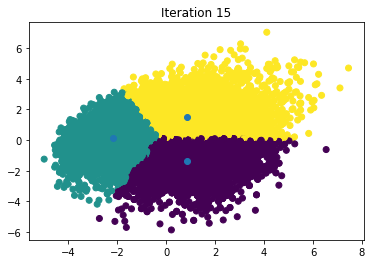

In [26]:
max_iterations = 100
k = 3

centroids = random_centroids(data, k)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, k)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [27]:
centroids

,0,1,2
overall,4.736048,3.185285,5.886787
potential,4.718188,5.211105,6.674620
wage_eur,1.076678,1.019062,1.292133
value_eur,1.045260,1.028294,1.315698
age,5.408592,2.508683,3.693458


In [28]:
labels.value_counts()

0    7032
1    6234
2    5441
dtype: int64

In [29]:
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
212,G. Buffon,82,82,41000.0,3400000.0,42
367,Joaquín,80,80,22000.0,7000000.0,38
372,F. Quagliarella,80,80,22000.0,7000000.0,37
503,Quaresma,79,79,11000.0,5500000.0,36
504,Pepe Reina,79,79,30000.0,1900000.0,37
...,...,...,...,...,...,...
18805,A. Foley,50,50,500.0,45000.0,30
18852,Gao Xiang,49,49,2000.0,40000.0,31
18885,L. Walker,48,48,1000.0,30000.0,30
18917,Wang Jianwen,48,48,2000.0,35000.0,32


In [30]:
from sklearn.cluster import KMeans

In [31]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [33]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
overall,6.218240,4.777872,3.502578
potential,6.775244,4.741251,5.400499
wage_eur,1.404677,1.075129,1.024218
value_eur,1.438303,1.042224,1.035192
age,4.124703,5.526427,2.680056
